### apriori 사이트
- https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/
- https://pypi.org/project/apyori/

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
chipo=pd.read_csv("chipotle.csv") #tsv - 정규표현식을 사용해야 할 때가 있다
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [3]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


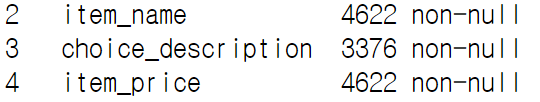
- 결측값이 약 1300여건

In [4]:
 chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [5]:
chipo.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [6]:
chipo["quantity"].describe()

count    4622.000000
mean        1.075725
std         0.410186
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        15.000000
Name: quantity, dtype: float64

# item_price를 수치형으로 나타내기, 그리고 소수점 이하 살리기

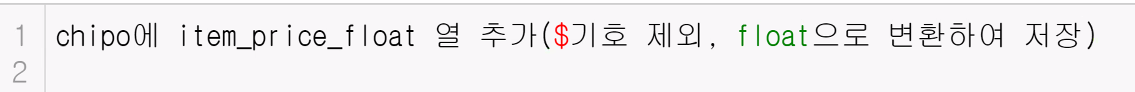
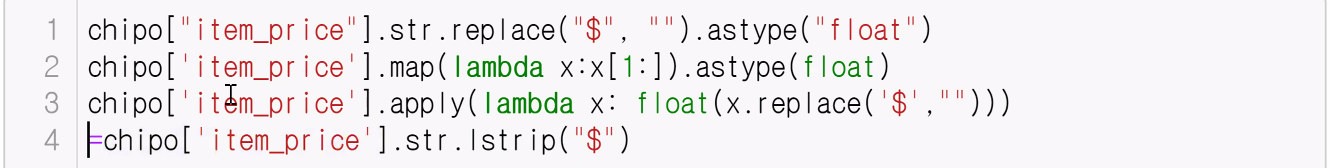

In [7]:
chipo['item_price_float'] = chipo['item_price'].str.replace('$', '').astype('float')
chipo['item_price_float']

C:\Users\user\AppData\Local\Temp\ipykernel_12268\109628914.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipo['item_price_float'] = chipo['item_price'].str.replace('$', '').astype('float')


0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price_float, Length: 4622, dtype: float64

In [8]:
chipo["item_price"].str.replace("$", "").astype("float")
chipo['item_price'].map(lambda x:x[1:]).astype(float)
chipo['item_price'].apply(lambda x: float(x.replace('$',"")))
chipo['item_price_float']=chipo['item_price'].str.lstrip("$").astype(float)

C:\Users\user\AppData\Local\Temp\ipykernel_12268\242845.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipo["item_price"].str.replace("$", "").astype("float")


In [9]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,item_price_float
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98


In [10]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   object 
 5   item_price_float    4622 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 216.8+ KB


In [11]:
chipo.describe()

,order_id,quantity,item_price_float
count,4622.000000,4622.000000,4622.000000
mean,927.254868,1.075725,7.464336
std,528.890796,0.410186,4.245557
min,1.000000,1.000000,1.090000
25%,477.250000,1.000000,3.390000
50%,926.000000,1.000000,8.750000
75%,1393.000000,1.000000,9.250000
max,1834.000000,15.000000,44.250000


In [12]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,item_price_float
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98


In [13]:
chipo["item_name"]

0                Chips and Fresh Tomato Salsa
1                                        Izze
2                            Nantucket Nectar
3       Chips and Tomatillo-Green Chili Salsa
4                                Chicken Bowl
                        ...                  
4617                            Steak Burrito
4618                            Steak Burrito
4619                       Chicken Salad Bowl
4620                       Chicken Salad Bowl
4621                       Chicken Salad Bowl
Name: item_name, Length: 4622, dtype: object

In [14]:
chipo["item_name"].unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

In [15]:
len(chipo["item_name"].unique())

50

In [16]:
chipo["item_name"].value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

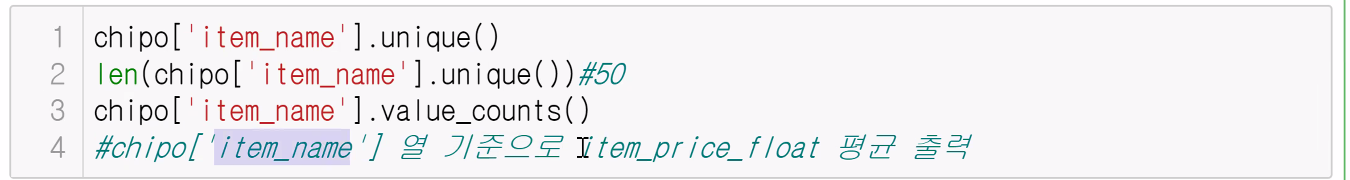

### 이러한 과정은 전처리를 통해 달러기호도 없에고 했기때문에 실행이 가능한 것

In [17]:
"""
chipo.groupby('item_name').mean('item_price_float')
chipo.groupby('item_name').mean()['item_price_float']
chipo.groupby('item_name').item_price_float.mean()
chipo.groupby('item_name')['item_price_float'].mean()
chipo['one_quantity'] = chipo['item_price_float'] / chipo['quantity']
chipo_cost = chipo.groupby('item_name')['one_quantity'].mean()
chipo_cost
"""

"\nchipo.groupby('item_name').mean('item_price_float')\nchipo.groupby('item_name').mean()['item_price_float']\nchipo.groupby('item_name').item_price_float.mean()\nchipo.groupby('item_name')['item_price_float'].mean()\nchipo['one_quantity'] = chipo['item_price_float'] / chipo['quantity']\nchipo_cost = chipo.groupby('item_name')['one_quantity'].mean()\nchipo_cost\n"

In [18]:
chipo.groupby('item_name').mean()['item_price_float']

C:\Users\user\AppData\Local\Temp\ipykernel_12268\2550148329.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chipo.groupby('item_name').mean()['item_price_float']


item_name
6 Pack Soft Drink                         6.610185
Barbacoa Bowl                            10.187273
Barbacoa Burrito                          9.832418
Barbacoa Crispy Tacos                    10.928182
Barbacoa Salad Bowl                      10.640000
Barbacoa Soft Tacos                      10.018400
Bottled Water                             1.867654
Bowl                                     14.800000
Burrito                                   7.400000
Canned Soda                               1.320577
Canned Soft Drink                         1.457641
Carnitas Bowl                            10.833971
Carnitas Burrito                         10.132712
Carnitas Crispy Tacos                    11.137143
Carnitas Salad                            8.990000
Carnitas Salad Bowl                      11.056667
Carnitas Soft Tacos                       9.398500
Chicken Bowl                             10.113953
Chicken Burrito                          10.082857
Chicken Crispy Tacos 

In [19]:
chipo.groupby("item_name").groups

{'6 Pack Soft Drink': [298, 341, 357, 388, 417, 553, 639, 721, 743, 879, 1026, 1051, 1124, 1167, 1260, 1279, 1392, 1755, 1758, 1849, 1860, 1916, 1922, 1937, 1976, 2108, 2232, 2374, 2389, 2713, 2793, 2860, 3010, 3132, 3141, 3389, 3422, 3600, 3614, 3633, 3693, 3766, 3789, 3806, 3836, 3875, 3886, 4169, 4174, 4359, 4363, 4522, 4527, 4535], 'Barbacoa Bowl': [39, 58, 95, 115, 127, 136, 219, 254, 418, 471, 592, 750, 803, 804, 840, 919, 1032, 1068, 1174, 1175, 1179, 1235, 1236, 1264, 1347, 1357, 1383, 1417, 1419, 1420, 1643, 1650, 1670, 1746, 1804, 1970, 2013, 2073, 2253, 2372, 2399, 2517, 2620, 2667, 2749, 2762, 2800, 3017, 3025, 3195, 3245, 3253, 3376, 3394, 3547, 3549, 3822, 4046, 4056, 4135, 4140, 4380, 4441, 4485, 4510, 4594], 'Barbacoa Burrito': [21, 81, 121, 130, 144, 222, 249, 334, 375, 385, 397, 450, 502, 543, 557, 561, 574, 575, 586, 602, 615, 717, 723, 742, 756, 853, 854, 859, 878, 888, 903, 981, 1055, 1100, 1119, 1151, 1187, 1202, 1300, 1531, 1532, 1584, 1599, 1648, 1812, 1846, 213

In [20]:
chipo_cost=chipo.groupby('item_name')['item_price_float'].mean()
chipo_cost

item_name
6 Pack Soft Drink                         6.610185
Barbacoa Bowl                            10.187273
Barbacoa Burrito                          9.832418
Barbacoa Crispy Tacos                    10.928182
Barbacoa Salad Bowl                      10.640000
Barbacoa Soft Tacos                      10.018400
Bottled Water                             1.867654
Bowl                                     14.800000
Burrito                                   7.400000
Canned Soda                               1.320577
Canned Soft Drink                         1.457641
Carnitas Bowl                            10.833971
Carnitas Burrito                         10.132712
Carnitas Crispy Tacos                    11.137143
Carnitas Salad                            8.990000
Carnitas Salad Bowl                      11.056667
Carnitas Soft Tacos                       9.398500
Chicken Bowl                             10.113953
Chicken Burrito                          10.082857
Chicken Crispy Tacos 

In [21]:
chipo_cost.sort_values(ascending=False)

item_name
Bowl                                     14.800000
Steak Salad Bowl                         11.847931
Chicken Salad Bowl                       11.170455
Carnitas Crispy Tacos                    11.137143
Carnitas Salad Bowl                      11.056667
Barbacoa Crispy Tacos                    10.928182
Carnitas Bowl                            10.833971
Steak Bowl                               10.711801
Barbacoa Salad Bowl                      10.640000
Veggie Soft Tacos                        10.565714
Steak Burrito                            10.465842
Veggie Bowl                              10.211647
Steak Crispy Tacos                       10.209714
Barbacoa Bowl                            10.187273
Veggie Salad Bowl                        10.138889
Carnitas Burrito                         10.132712
Chicken Bowl                             10.113953
Chicken Burrito                          10.082857
Chicken Crispy Tacos                     10.045319
Barbacoa Soft Tacos  

In [22]:
chipo['one_quantity'] = chipo['item_price_float'] / chipo['quantity']
chipo_cost = chipo.groupby('item_name')['one_quantity'].mean()
chipo_cost

item_name
6 Pack Soft Drink                         6.490000
Barbacoa Bowl                            10.187273
Barbacoa Burrito                          9.832418
Barbacoa Crispy Tacos                    10.087273
Barbacoa Salad Bowl                      10.640000
Barbacoa Soft Tacos                      10.018400
Bottled Water                             1.431667
Bowl                                      7.400000
Burrito                                   7.400000
Canned Soda                               1.090000
Canned Soft Drink                         1.250000
Carnitas Bowl                            10.315588
Carnitas Burrito                          9.975932
Carnitas Crispy Tacos                     9.852857
Carnitas Salad                            8.990000
Carnitas Salad Bowl                      11.056667
Carnitas Soft Tacos                       9.398500
Chicken Bowl                              9.657727
Chicken Burrito                           9.475949
Chicken Crispy Tacos 

In [23]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,item_price_float,one_quantity
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98,8.49


In [26]:
chipo.drop(["order_id"],axis="columns",inplace=True)

In [27]:
chipo["choice_description"]

0                                                     NaN
1                                            [Clementine]
2                                                 [Apple]
3                                                     NaN
4       [Tomatillo-Red Chili Salsa (Hot), [Black Beans...
                              ...                        
4617    [Fresh Tomato Salsa, [Rice, Black Beans, Sour ...
4618    [Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...
4619    [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...
4620    [Fresh Tomato Salsa, [Fajita Vegetables, Lettu...
4621    [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...
Name: choice_description, Length: 4622, dtype: object

In [28]:
chipo["choice_description"].value_counts()

[Diet Coke]                                                                                                                                      134
[Coke]                                                                                                                                           123
[Sprite]                                                                                                                                          77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                                                                            42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]                                                                 40
                                                                                                                                                ... 
[Fresh Tomato Salsa (Mild), [Pinto Beans, Black Beans, Rice, Cheese, Sour Cream, Lettuce]]                

In [31]:
chipo["choice_description"].fillna("Origin",inplace=True)

In [33]:
chipo["choice_description"]

0                                                  Origin
1                                            [Clementine]
2                                                 [Apple]
3                                                  Origin
4       [Tomatillo-Red Chili Salsa (Hot), [Black Beans...
                              ...                        
4617    [Fresh Tomato Salsa, [Rice, Black Beans, Sour ...
4618    [Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...
4619    [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...
4620    [Fresh Tomato Salsa, [Fajita Vegetables, Lettu...
4621    [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...
Name: choice_description, Length: 4622, dtype: object

In [39]:
chipo["choice_description"].loc[1]

'[Clementine]'

In [35]:
chipo["choice_description"].loc[4]

'[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]'

In [36]:
# 이 데이터들은 리스트 구조가 아니다, 리스트 처럼 생겼지만 문자열이므로 문자열 함수가 적용이 되야함

# apriori 알고리즘 사용해야함

In [42]:
chipo=pd.read_csv("chipotle.csv") #tsv - 정규표현식을 사용해야 할 때가 있다
chipo #chipo에서 order_id가 같은 데이터끼리 묶어서 트랜잭션으로 구성

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [59]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [44]:
df=chipo[["order_id","item_name"]]
df

,order_id,item_name
0,1,Chips and Fresh Tomato Salsa
1,1,Izze
2,1,Nantucket Nectar
3,1,Chips and Tomatillo-Green Chili Salsa
4,2,Chicken Bowl
...,...,...
4617,1833,Steak Burrito
4618,1833,Steak Burrito
4619,1834,Chicken Salad Bowl
4620,1834,Chicken Salad Bowl


In [54]:
df['order_id'].max()

1834

### 이중 리스트

In [61]:
df_arr=[[] for i in range(1, df['order_id'].max()+1)] # 1~1834+1
# 이중 리스트 구조, i가 1834가 될때까지 저기 for문앞 빈 리스트안에 들어감
# [ [], [], [], .......[]] =>  transactionEncoder

In [60]:
np.shape(df_arr) #[[Chips and Fresh Tomato Salsa], [ ]. [], .....[ ]]

(1834, 0)

In [66]:
df["order_id"][4]

2

#### 아래는 어려운 코드 잘 해석하기

In [113]:
grouped = df.groupby('order_id')['item_name'].agg(list).reset_index()
grouped

,order_id,item_name
0,1,"[Chips and Fresh Tomato Salsa, Izze, Nantucket..."
1,2,[Chicken Bowl]
2,3,"[Chicken Bowl, Side of Chips]"
3,4,"[Steak Burrito, Steak Soft Tacos]"
4,5,"[Steak Burrito, Chips and Guacamole]"
...,...,...
1829,1830,"[Steak Burrito, Veggie Burrito]"
1830,1831,"[Carnitas Bowl, Chips, Bottled Water]"
1831,1832,"[Chicken Soft Tacos, Chips and Guacamole]"
1832,1833,"[Steak Burrito, Steak Burrito]"


In [68]:
n=0
for i in df["item_name"]:
    df_arr[df["order_id"][n]-1].append(i)
    n+=1
     # df_arr에 i가 append되어야 함

In [77]:
df_arr

[['Chips and Fresh Tomato Salsa',
  'Izze',
  'Nantucket Nectar',
  'Chips and Tomatillo-Green Chili Salsa',
  'Chips and Fresh Tomato Salsa',
  'Izze',
  'Nantucket Nectar',
  'Chips and Tomatillo-Green Chili Salsa'],
 ['Chicken Bowl', 'Chicken Bowl'],
 ['Chicken Bowl', 'Side of Chips', 'Chicken Bowl', 'Side of Chips'],
 ['Steak Burrito', 'Steak Soft Tacos', 'Steak Burrito', 'Steak Soft Tacos'],
 ['Steak Burrito',
  'Chips and Guacamole',
  'Steak Burrito',
  'Chips and Guacamole'],
 ['Chicken Crispy Tacos',
  'Chicken Soft Tacos',
  'Chicken Crispy Tacos',
  'Chicken Soft Tacos'],
 ['Chicken Bowl',
  'Chips and Guacamole',
  'Chicken Bowl',
  'Chips and Guacamole'],
 ['Chips and Tomatillo-Green Chili Salsa',
  'Chicken Burrito',
  'Chips and Tomatillo-Green Chili Salsa',
  'Chicken Burrito'],
 ['Chicken Burrito', 'Canned Soda', 'Chicken Burrito', 'Canned Soda'],
 ['Chicken Bowl',
  'Chips and Guacamole',
  'Chicken Bowl',
  'Chips and Guacamole'],
 ['Barbacoa Burrito',
  'Nantucket N

### 전체 주문에서 가장 많이 주문한 경우의 메뉴 개수는?

In [109]:
max([len(i) for i in df_arr])

46

In [110]:
maxi=0
for i in df_arr:
    if len(i) > maxi:
        maxi = len(i)
print(maxi)

46


In [111]:
element_counts= max([len(sublist) for sublist in df_arr])
element_counts

46

In [112]:
max_len=0
for i in df_arr:
    if len(i) >= max_len:
        max_len=len(i)
print(max_len)

46


In [92]:
meun=max(len(lst) for lst in df_arr)
meun

46

In [97]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [99]:
te=TransactionEncoder()
te_arr=te.fit(df_arr).transform(df_arr)

In [100]:
te_arr

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [103]:
te_df=pd.DataFrame(te_arr,columns=te.columns_)
te_df

,6 Pack Soft Drink,Barbacoa Bowl,Barbacoa Burrito,Barbacoa Crispy Tacos,Barbacoa Salad Bowl,Barbacoa Soft Tacos,Bottled Water,Bowl,Burrito,Canned Soda,...,Steak Crispy Tacos,Steak Salad,Steak Salad Bowl,Steak Soft Tacos,Veggie Bowl,Veggie Burrito,Veggie Crispy Tacos,Veggie Salad,Veggie Salad Bowl,Veggie Soft Tacos
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1830,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [120]:
freq_items=apriori(te_df, min_support=0.02, use_colnames=True)
freq_items

,support,itemsets
0,0.029444,(6 Pack Soft Drink)
1,0.033261,(Barbacoa Bowl)
2,0.047983,(Barbacoa Burrito)
3,0.083969,(Bottled Water)
4,0.051254,(Canned Soda)
5,0.150491,(Canned Soft Drink)
6,0.036532,(Carnitas Bowl)
7,0.031625,(Carnitas Burrito)
8,0.020720,(Carnitas Soft Tacos)
9,0.335333,(Chicken Bowl)


## association_rules

In [123]:
ar_df=association_rules(freq_items, metric="lift", min_threshold=1)
ar_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Chicken Bowl),(Bottled Water),0.335333,0.083969,0.037623,0.112195,1.336142,0.009465,1.031793,0.378500
1,(Bottled Water),(Chicken Bowl),0.083969,0.335333,0.037623,0.448052,1.336142,0.009465,1.204221,0.274638
2,(Chicken Bowl),(Canned Soft Drink),0.335333,0.150491,0.060523,0.180488,1.199328,0.010059,1.036604,0.250050
3,(Canned Soft Drink),(Chicken Bowl),0.150491,0.335333,0.060523,0.402174,1.199328,0.010059,1.111807,0.195642
4,(Chips),(Canned Soft Drink),0.113413,0.150491,0.031625,0.278846,1.852912,0.014557,1.177986,0.519192
5,(Canned Soft Drink),(Chips),0.150491,0.113413,0.031625,0.210145,1.852912,0.014557,1.122468,0.541853
6,(Chicken Bowl),(Chips),0.335333,0.113413,0.066521,0.198374,1.749124,0.028490,1.105985,0.644360
7,(Chips),(Chicken Bowl),0.113413,0.335333,0.066521,0.586538,1.749124,0.028490,1.607568,0.483072
8,(Steak Bowl),(Chips and Guacamole),0.102508,0.258451,0.028899,0.281915,1.090785,0.002405,1.032675,0.092735
9,(Chips and Guacamole),(Steak Bowl),0.258451,0.102508,0.028899,0.111814,1.090785,0.002405,1.010478,0.112236


In [131]:
# Chips가 판매중단 -> 영향???
ar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         10 non-null     object 
 1   consequents         10 non-null     object 
 2   antecedent support  10 non-null     float64
 3   consequent support  10 non-null     float64
 4   support             10 non-null     float64
 5   confidence          10 non-null     float64
 6   lift                10 non-null     float64
 7   leverage            10 non-null     float64
 8   conviction          10 non-null     float64
 9   zhangs_metric       10 non-null     float64
dtypes: float64(8), object(2)
memory usage: 932.0+ bytes


In [114]:
df['order_id'].value_counts().max()

23

In [117]:
for i in df_arr:
    if i >= len(max(df_arr)):
print(i)

IndentationError: expected an indented block after 'if' statement on line 2 (4240198988.py, line 3)

In [133]:
ar_df[ar_df['antecedents'] == frozenset({'Chips'})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(Chips),(Canned Soft Drink),0.113413,0.150491,0.031625,0.278846,1.852912,0.014557,1.177986,0.519192
7,(Chips),(Chicken Bowl),0.113413,0.335333,0.066521,0.586538,1.749124,0.028490,1.607568,0.483072


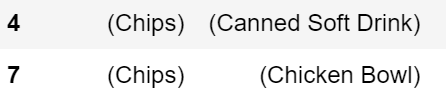
Chips자리에 대체할 수 있는지도 생각해 볼 것, 데이터의 양이 방대할 수록 대체품도 많을 것임

# 새로운 데이터사용

In [136]:
df=pd.read_csv("ex_data.csv")
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


### date가 object형식이라 치환

In [138]:
df=pd.read_csv("ex_data.csv", parse_dates=['Date'])
df

C:\Users\user\AppData\Local\Temp\ipykernel_12268\3572696704.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df=pd.read_csv("ex_data.csv", parse_dates=['Date'])


,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk
...,...,...,...
38760,4471,2014-08-10,sliced cheese
38761,2022,2014-02-23,candy
38762,1097,2014-04-16,cake bar
38763,1510,2014-03-12,fruit/vegetable juice


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


In [141]:
df.Date

0       2015-07-21
1       2015-05-01
2       2015-09-19
3       2015-12-12
4       2015-01-02
           ...    
38760   2014-08-10
38761   2014-02-23
38762   2014-04-16
38763   2014-03-12
38764   2014-12-26
Name: Date, Length: 38765, dtype: datetime64[ns]

In [142]:
df.Date.min()

Timestamp('2014-01-01 00:00:00')

In [144]:
df.Date.max()

Timestamp('2015-12-30 00:00:00')

###  가운데 dt를 넣어서  year가 출력되게 해야함

In [147]:
df.Date.dt.year

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
38760    2014
38761    2014
38762    2014
38763    2014
38764    2014
Name: Date, Length: 38765, dtype: int64

In [149]:
df["year"]=df.Date.dt.year
df["month"]=df.Date.dt.month
df["day"]=df.Date.dt.day
df["day_of_week"]=df.Date.dt.day_name()

In [150]:
df

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,Tuesday
1,2552,2015-05-01,whole milk,2015,5,1,Friday
2,2300,2015-09-19,pip fruit,2015,9,19,Saturday
3,1187,2015-12-12,other vegetables,2015,12,12,Saturday
4,3037,2015-01-02,whole milk,2015,1,2,Friday
...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,Sunday
38761,2022,2014-02-23,candy,2014,2,23,Sunday
38762,1097,2014-04-16,cake bar,2014,4,16,Wednesday
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,Wednesday


### 상위 10명의 고객 빈도수

Text(0, 0.5, 'cnt')

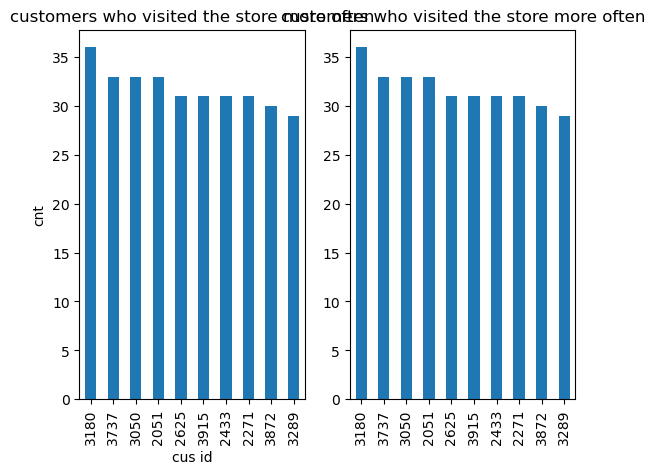

In [174]:
fig,(ax,ax2)=plt.subplots(ncols=2)
df["Member_number"].value_counts().head(10).plot(ax=ax, kind="bar",title="customers who visited the store more often")
ax.set_xlabel("cus id")
ax.set_ylabel("cnt")
df["Member_number"].value_counts().head(10).plot(ax=ax2, kind="bar",title="customers who visited the store more often")
ax.set_xlabel("cus id")
ax.set_ylabel("cnt")

### 상위,하위 10명의 고객 빈도수

Text(0, 0.5, 'cnt')

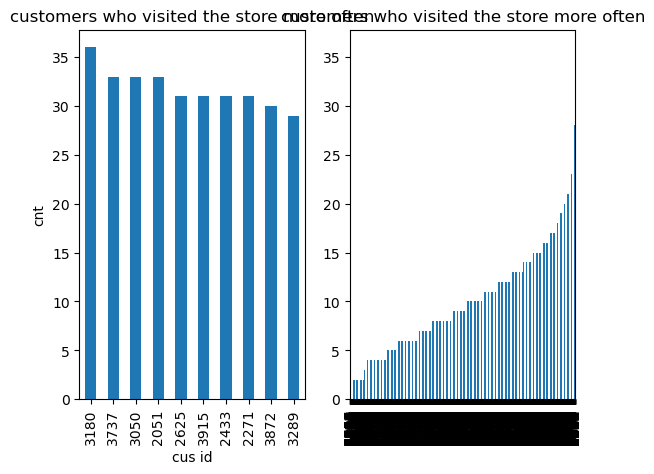

In [173]:
fig,(ax,ax2)=plt.subplots(ncols=2)
df["Member_number"].value_counts().head(10).plot(ax=ax, kind="bar",title="customers who visited the store more often")
ax.set_xlabel("cus id")
ax.set_ylabel("cnt")
df["Member_number"].value_counts(ascending=True).plot(ax=ax2, kind="bar",title="customers who visited the store more often")
ax.set_xlabel("cus id")
ax.set_ylabel("cnt")

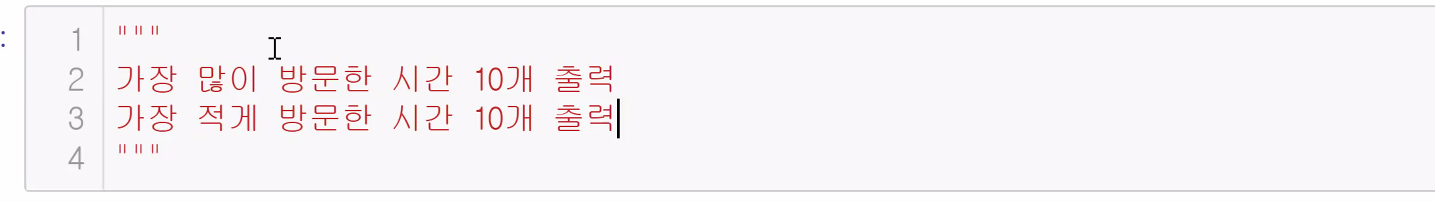

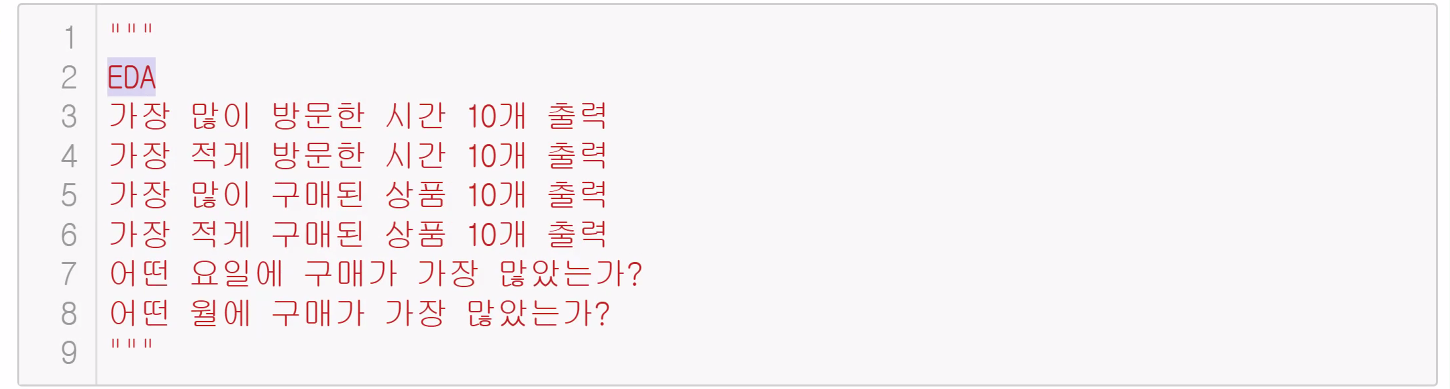

In [ ]:
fig,(ax,ax2)=plt.subplots(ncols=2)
df["Member_number"].value_counts().head(10).plot(ax=ax, kind="bar",title="customers who visited the store more often")
ax.set_xlabel("cus id")
ax.set_ylabel("cnt")
df["Member_number"].value_counts(ascending=True).plot(ax=ax2, kind="bar",title="customers who visited the store more often")
ax.set_xlabel("cus id")
ax.set_ylabel("cnt")

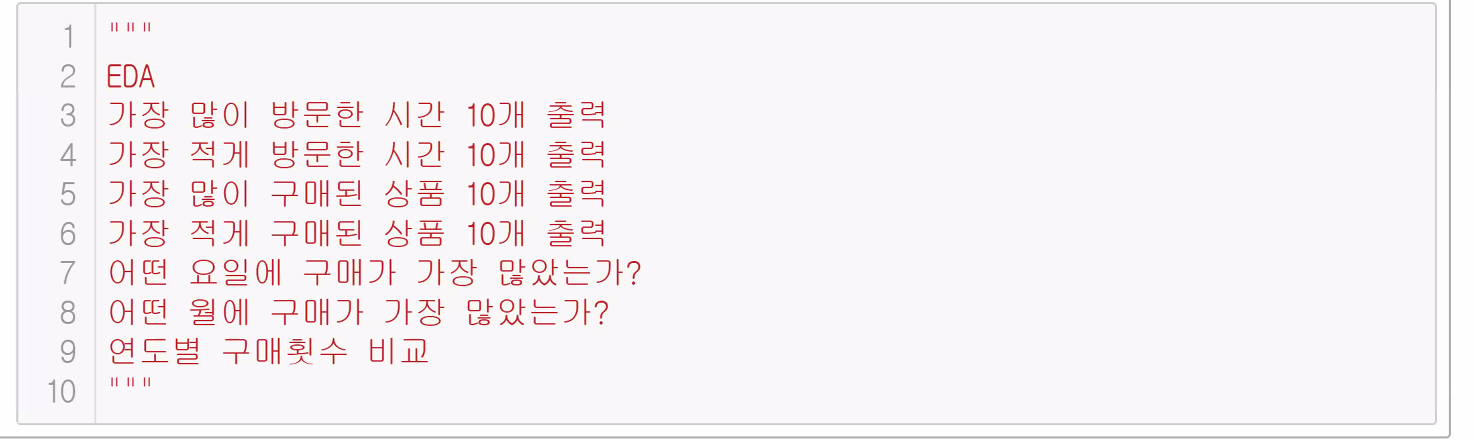

In [176]:
pip install apyori

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5975 sha256=0bf29fa62e33a64bc64c57aa67e24dd9b30feec64a5eccd3a9e6f2abb3399a1c
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\77\3d\a6\d317a6fb32be58a602b1e8c6b5d6f31f79322da554cad2a5ea
Successfully built apyori
Note: you may need to restart the kernel to use updated packages.


In [177]:
import apyori

In [178]:
df

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,Tuesday
1,2552,2015-05-01,whole milk,2015,5,1,Friday
2,2300,2015-09-19,pip fruit,2015,9,19,Saturday
3,1187,2015-12-12,other vegetables,2015,12,12,Saturday
4,3037,2015-01-02,whole milk,2015,1,2,Friday
...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,Sunday
38761,2022,2014-02-23,candy,2014,2,23,Sunday
38762,1097,2014-04-16,cake bar,2014,4,16,Wednesday
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,Wednesday


# 판매된 물건의 종류

In [185]:
df.groupby("Date")["itemDescription"].nunique()

Date
2014-01-01    30
2014-01-02    45
2014-01-03    36
2014-01-04    33
2014-01-05    31
              ..
2015-12-26    26
2015-12-27    43
2015-12-28    37
2015-12-29    33
2015-12-30    34
Name: itemDescription, Length: 728, dtype: int64

In [187]:
df_time=df.groupby("Date")["itemDescription"].nunique().index
df_time

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10',
               ...
               '2015-12-21', '2015-12-22', '2015-12-23', '2015-12-24',
               '2015-12-25', '2015-12-26', '2015-12-27', '2015-12-28',
               '2015-12-29', '2015-12-30'],
              dtype='datetime64[ns]', name='Date', length=728, freq=None)

In [190]:
df.groupby("Date")["itemDescription"].nunique()

Date
2014-01-01    30
2014-01-02    45
2014-01-03    36
2014-01-04    33
2014-01-05    31
              ..
2015-12-26    26
2015-12-27    43
2015-12-28    37
2015-12-29    33
2015-12-30    34
Name: itemDescription, Length: 728, dtype: int64

# 상품 종류 개수
# 일별 판매된 상품 종류 개수

In [204]:
df_time=df.groupby("Date")["itemDescription"].nunique().values
df_time

array([30, 45, 36, 33, 31, 26, 31, 38, 46, 35, 20, 31, 33, 37, 23, 29, 32,
       39, 36, 35, 40, 28, 47, 35, 32, 21, 30, 43, 25, 41, 47, 37, 31, 38,
       39, 35, 40, 41, 40, 44, 28, 34, 34, 35, 36, 36, 35, 37, 42, 33, 37,
       31, 40, 28, 44, 37, 46, 36, 36, 34, 40, 31, 52, 32, 34, 27, 31, 38,
       31, 32, 35, 28, 34, 31, 34, 31, 33, 26, 29, 36, 25, 25, 40, 26, 29,
       37, 43, 28, 31, 33, 31, 41, 47, 39, 33, 34, 21, 35, 43, 27, 26, 24,
       49, 27, 39, 39, 42, 30, 39, 29, 35, 39, 37, 41, 35, 27, 32, 33, 27,
       40, 43, 29, 27, 38, 34, 29, 40, 38, 40, 36, 55, 32, 42, 38, 39, 24,
       29, 30, 38, 35, 28, 30, 35, 28, 41, 38, 33, 40, 41, 42, 42, 40, 29,
       32, 35, 32, 48, 39, 28, 42, 30, 20, 38, 41, 42, 29, 31, 29, 30, 37,
       49, 32, 45, 33, 32, 40, 38, 37, 30, 21, 35, 43, 28, 26, 35, 30, 38,
       52, 39, 39, 36, 37, 21, 43, 28, 33, 28, 37, 35, 33, 41, 35, 39, 38,
       26, 29, 42, 29, 33, 36, 37, 40, 34, 30, 35, 38, 40, 33, 33, 25, 32,
       33, 28, 29, 36, 37

In [207]:
#df_time["prd_num"]=pd.Series(df.groupby("Date")["itemDescription"].nunique().values)

In [198]:
df.groupby("Date")["Member_number"].nunique()

Date
2014-01-01    21
2014-01-02    29
2014-01-03    24
2014-01-04    28
2014-01-05    20
              ..
2015-12-26    15
2015-12-27    21
2015-12-28    19
2015-12-29    22
2015-12-30    19
Name: Member_number, Length: 728, dtype: int64

In [200]:
df.groupby("Date")["Member_number"].nunique().values

array([21, 29, 24, 28, 20, 13, 16, 19, 28, 23, 15, 18, 20, 24, 13, 18, 20,
       22, 23, 24, 24, 17, 30, 19, 18, 14, 22, 26, 16, 27, 28, 25, 20, 26,
       28, 26, 26, 27, 30, 27, 18, 21, 23, 21, 24, 21, 24, 25, 26, 18, 23,
       21, 29, 18, 27, 21, 31, 25, 20, 21, 25, 23, 34, 23, 27, 16, 22, 24,
       19, 20, 27, 19, 18, 21, 20, 18, 19, 16, 20, 23, 16, 16, 19, 21, 18,
       23, 24, 18, 21, 19, 17, 28, 26, 23, 20, 20, 10, 22, 29, 19, 16, 16,
       34, 18, 26, 26, 27, 20, 26, 19, 22, 25, 23, 28, 24, 16, 20, 17, 16,
       24, 24, 16, 16, 21, 17, 18, 24, 22, 23, 19, 35, 17, 25, 21, 27, 13,
       21, 24, 25, 24, 16, 18, 25, 20, 27, 24, 22, 24, 30, 35, 29, 23, 20,
       17, 19, 21, 31, 22, 16, 27, 19, 13, 25, 30, 27, 17, 22, 15, 18, 26,
       25, 22, 29, 18, 23, 23, 29, 24, 20, 12, 20, 27, 16, 15, 21, 20, 29,
       33, 23, 30, 22, 31, 12, 27, 21, 21, 17, 25, 23, 16, 23, 27, 26, 24,
       15, 18, 27, 21, 23, 20, 22, 25, 22, 19, 21, 23, 29, 23, 19, 16, 18,
       21, 21, 18, 21, 27